<a href="https://colab.research.google.com/github/ValerieLangat/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Valerie_Langat_DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np
columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']

df = pd.read_csv('https://raw.githubusercontent.com/ValerieLangat/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/master/crx.data', names=columns)
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [0]:
columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']

df2 = pd.read_csv('https://raw.githubusercontent.com/ValerieLangat/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/master/crx.data', names=columns)
df2.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [0]:
df2 = df2.drop(['B', 'C', 'H', 'K', 'N', 'O'], axis=1)
df2

,A,D,E,F,G,I,J,L,M,P
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+
5,b,u,g,m,v,t,f,t,g,+
6,b,u,g,r,h,t,f,t,g,+
7,a,u,g,cc,v,t,f,f,g,+
8,b,y,p,k,h,t,f,f,g,+
9,b,y,p,w,v,t,f,t,g,+


In [0]:
df = df.drop(['A', 'D', 'E', 'F', 'G', 'I', 'J', 'L', 'M'], axis=1)

In [0]:
df['B'] = pd.to_numeric(df['B'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)

df ['N'] = pd.to_numeric(df['N'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)

In [0]:
df.dtypes

B    float64
C    float64
H    float64
K      int64
N    float64
O      int64
P     object
dtype: object

In [0]:
df.isna().sum()

B    0
C    0
H    0
K    0
N    0
O    0
P    0
dtype: int64

In [0]:
df.describe()

,C,H,K,O
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
categorical = df2

A     ?    a    b  All
P                     
+     3   98  206  307
-     9  112  262  383
All  12  210  468  690


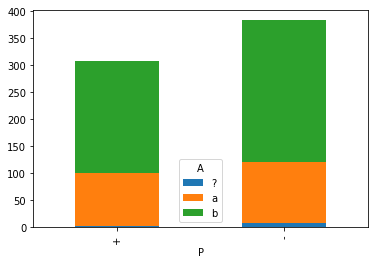

D    ?  l    u    y  All
P                       
+    4  2  256   45  307
-    2  0  263  118  383
All  6  2  519  163  690


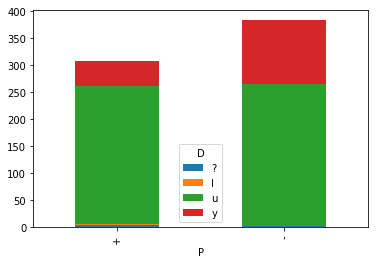

E    ?    g  gg    p  All
P                        
+    4  256   2   45  307
-    2  263   0  118  383
All  6  519   2  163  690


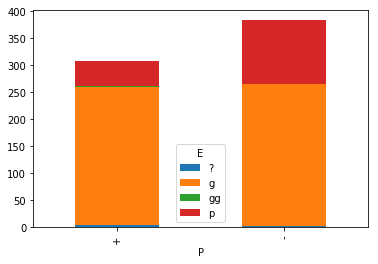

F    ?  aa    c  cc   d   e  ff   i   j   k   m   q  r   w   x  All
P                                                                  
+    4  19   62  29   7  14   7  14   3  14  16  51  2  33  32  307
-    5  35   75  12  23  11  46  45   7  37  22  27  1  31   6  383
All  9  54  137  41  30  25  53  59  10  51  38  78  3  64  38  690


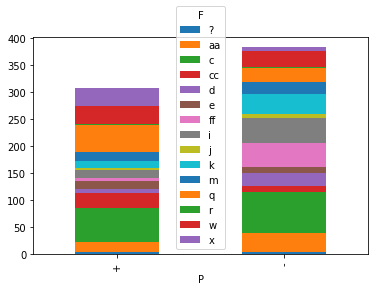

G    ?  bb  dd  ff    h  j  n  o    v  z  All
P                                            
+    4  25   2   8   87  3  2  1  169  6  307
-    5  34   4  49   51  5  2  1  230  2  383
All  9  59   6  57  138  8  4  2  399  8  690


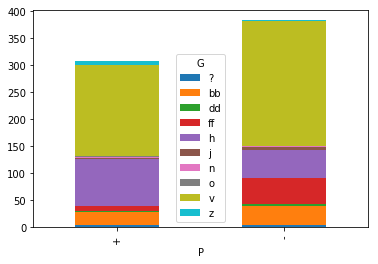

I      f    t  All
P                 
+     23  284  307
-    306   77  383
All  329  361  690


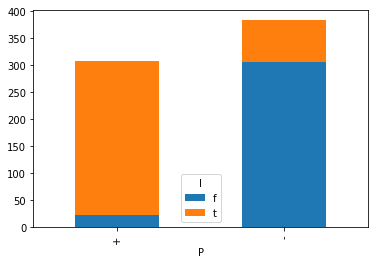

J      f    t  All
P                 
+     98  209  307
-    297   86  383
All  395  295  690


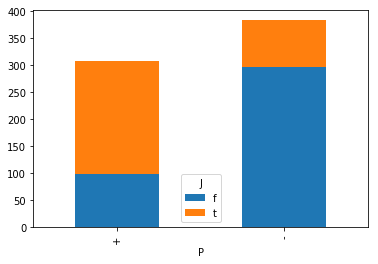

L      f    t  All
P                 
+    161  146  307
-    213  170  383
All  374  316  690


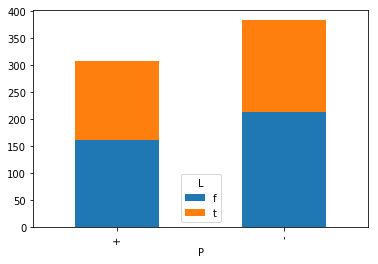

M      g  p   s  All
P                   
+    287  5  15  307
-    338  3  42  383
All  625  8  57  690


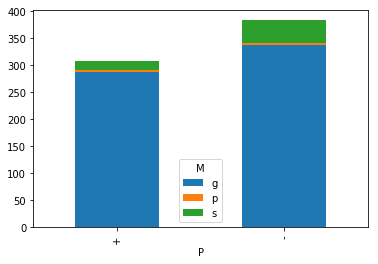

P      +    -  All
P                 
+    307    0  307
-      0  383  383
All  307  383  690


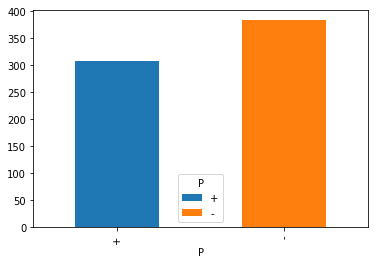

In [0]:
for feat in categorical:
    print(pd.crosstab(df2['P'], df2[feat], margins=True))
    pd.crosstab(df['P'], df2[feat]).plot(kind='bar', stacked=True)
    plt.show()

As expected, column I returned a super low p value

In [0]:
contin = pd.crosstab(df2['P'], df2['I'])
contin = contin.values
chi_squared, p_value, dof, expected = stats.chi2_contingency(contin)

print('Column I')
print('Chi-Squared Test: ', chi_squared)
print('P-Value: ', p_value)
print('Degrees of Freedom: ', dof)

Column I
Chi-Squared Test:  355.2038167412799
P-Value:  3.1185900878457007e-79
Degrees of Freedom:  1


Not a great difference with Column M compared to column I

In [0]:
contin = pd.crosstab(df2['P'], df2['M'])
contin = contin.values
chi_squared, p_value, dof, expected = stats.chi2_contingency(contin)

print('Column M')
print('Chi-Squared Test: ', chi_squared)
print('P-Value: ', p_value)
print('Degrees of Freedom: ', dof)

Column M
Chi-Squared Test:  9.191570451545383
P-Value:  0.010094291370456362
Degrees of Freedom:  2


In [0]:
grouped = df.groupby('P', axis='rows')

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
grouped.describe()

B                                                              C                                                          H                                                          K                                                    N                                                                O                                                             
   count       mean        std  min     25%    50%    75%    max  count      mean       std  min    25%   50%   75%     max  count      mean       std  min    25%    50%  75%     max  count      mean       std  min  25%  50%  75%   max  count        mean         std  min    25%    50%    75%     max  count         mean          std  min  25%    50%     75%       max
P                                                                                                                                                                                                                                                                                                                                                                               
+  307.0  33.500814  13.053653  0.0  23.170  30.17  41.33  76.75  307.0  5.904951  5.471485  0.0  1.500  4.46  9.52  28.000  307.0  3.427899  4.120792  0.0  0.750  2.000  5.0  28.500  307.0  4.605863  6.320242  0.0  0.0  3.0  7.0  67.0  307.0  161.208469  161.791065  0.0    0.0  117.0  277.0   840.0  307.0  2038.859935  7659.763941  0.0  0.0  221.0  1209.0  100000.0
-  383.0  29.029948  11.779743  0.0  21.625  26.83  34.79  80.25  383.0  3.839948  4.337662  0.0  0.835  2.21  5.00  26.335  383.0  1.257924  2.120481  0.0  0.125  0.415  1.5  13.875  383.0  0.631854  1.900049  0.0  0.0  0.0  0.0  20.0  383.0  196.049608  181.876692  0.0  100.0  160.0  270.0  2000.0  383.0   198.605744   671.608839  0.0  0.0    1.0    67.0    5552.0

Will run ttests between the K category

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import seaborn as sns

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, interval)

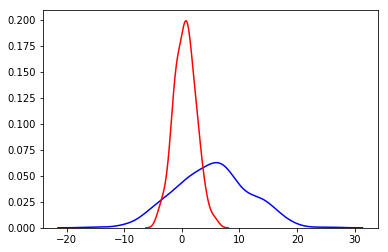

In [0]:
groupK_pos = np.random.normal(4.605863, 6.320242, 307)
groupK_neg = np.random.normal(0.631854, 1.900049, 383)

sns.kdeplot(groupK_pos, color='b');
sns.kdeplot(groupK_neg, color='r');

In [0]:
ttest_ind(groupK_pos, groupK_neg)

Ttest_indResult(statistic=13.662779008981364, pvalue=8.950096021046031e-38)

Now running ttest on O category

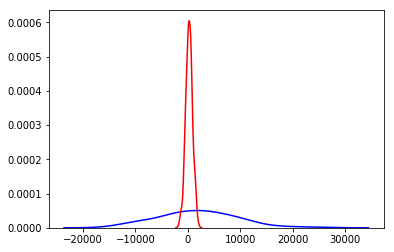

In [0]:
groupO_pos = np.random.normal(2038.859935, 7659.763941, 307)
groupO_neg = np.random.normal(198.605744, 671.608839, 383)

sns.kdeplot(groupO_pos, color='b');
sns.kdeplot(groupO_neg, color='r');

In [0]:
ttest_ind(groupO_pos, groupO_neg)

Ttest_indResult(statistic=4.080951125445586, pvalue=5.011234386786884e-05)

Chi Squared Tests:

In [0]:
df1 = df[['P', 'K']]
df1.head()

In [0]:
df1['K'].value_counts()

In [0]:
newframe = df1.groupby(['P', 'K'])['K'].count().unstack().fillna(0)
newframe

K,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,23,40,67
P,,,,,,,,,,,,,,,,,,,,,,,
+,98.0,35.0,19.0,20.0,12.0,16.0,20.0,15.0,10.0,10.0,4.0,18.0,7.0,1.0,8.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0
-,297.0,36.0,26.0,8.0,3.0,2.0,3.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [0]:
newframe.values

array([[ 98.,  35.,  19.,  20.,  12.,  16.,  20.,  15.,  10.,  10.,   4.,
         18.,   7.,   1.,   8.,   4.,   3.,   2.,   1.,   1.,   1.,   1.,
          1.],
       [297.,  36.,  26.,   8.,   3.,   2.,   3.,   1.,   0.,   0.,   4.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.]])

In [0]:
Neg = df[df['P'] == '-']
Pos = df[df['P'] == '+']

In [0]:
Neg

In [0]:
Pos

In [0]:
from scipy import stats
import matplotlib.pyplot as plt

Looking at my groupby columns, I expected that column O would not give me an extreme P-value score

In [0]:
contin = pd.crosstab(df['P'], df['O'])
contin = contin.values
chi_squared, p_value, dof, expected = stats.chi2_contingency(contin)

print('Column O')
print('Chi-Squared Test: ', chi_squared)
print('P-Value: ', p_value)
print('Degrees of Freedom: ', dof)

Column O
Chi-Squared Test:  314.9405211993805
P-Value:  0.0007080702494902256
Degrees of Freedom:  239


Column K gives me a much lower p-Value than column O

In [0]:
contin = pd.crosstab(df['P'], df['K'])
contin = contin.values
chi_squared, p_value, dof, expected = stats.chi2_contingency(contin)

print('Column K')
print('Chi-Squared Test: ', chi_squared)
print('P-Value: ', p_value)
print('Degrees of Freedom: ', dof)

Column K
Chi-Squared Test:  203.41293121441763
P-Value:  2.4412392119596036e-31
Degrees of Freedom:  22


Confidence Intervals:

In [0]:
def credit_approval(interval, classP, numb):
  graph = f'{classP} has tendancy to be related to {numb}'\
      f' {interval[0] * 100:,.2f} +/- {interval[1] * 100:,.2f}'\
      f' percent of the time, or between {(interval[0] - interval[1]) * 100:,.2f}%'\
      f' and {(interval[0] + interval[1]) * 100:,.2f}%'
  print(graph)

In [0]:
def credit_app_numbs(Neg, Pos):
  columns = Neg.columns
  for column in columns[1:]:
    credit_approval(confidence_interval(Neg[column]), 'Neg', column)
    credit_approval(confidence_interval(Pos[column]), 'Poss', column)
    print()

In [0]:
credit_app_numbs(Neg, Pos)

Neg has tendancy to be related to C 383.99 +/- 43.58 percent of the time, or between 340.42% and 427.57%
Poss has tendancy to be related to C 590.50 +/- 61.45 percent of the time, or between 529.05% and 651.94%

Neg has tendancy to be related to H 125.79 +/- 21.30 percent of the time, or between 104.49% and 147.10%
Poss has tendancy to be related to H 342.79 +/- 46.28 percent of the time, or between 296.51% and 389.07%

Neg has tendancy to be related to K 63.19 +/- 19.09 percent of the time, or between 44.10% and 82.27%
Poss has tendancy to be related to K 460.59 +/- 70.98 percent of the time, or between 389.61% and 531.57%

Neg has tendancy to be related to N 19,604.96 +/- 1,827.28 percent of the time, or between 17,777.69% and 21,432.24%
Poss has tendancy to be related to N 16,120.85 +/- 1,817.00 percent of the time, or between 14,303.85% and 17,937.85%

Neg has tendancy to be related to O 19,860.57 +/- 6,747.51 percent of the time, or between 13,113.07% and 26,608.08%
Poss has tenda

TypeError: ignored

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. Column O showed that there was not too much of a difference between that column and the sample mean. Column K showed a bigger difference.
2.Column I's chi squared tells me that we should reject the null hypothesis because it does not fit the model
Although I believe column M's chi squared test does not fit the model and that we should probably reject the null hypothesis, it is less extreme than column I
3. The most challenging part of this sprint challenge was getting my models and tests done in the amount of time available after a couple of my methods didn't work the first try.

*Your words here!*